# Data generation for 2020-2023

This notebook has the objective of generating data for the regression model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
dfIT = pd.read_csv('Data_04.csv')
dfIT=dfIT.set_index('date')
dfIT.index=pd.to_datetime(dfIT.index, format='%Y-%m-%d')

extra_months = 25
new_index = pd.date_range(start=dfIT.index[0], periods=len(dfIT) + extra_months, freq='MS')
dfIT = dfIT.reindex(new_index)

ytp = 2 #years to predict

display(dfIT)

,ratio,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3
2010-01-01,0.970427,7807.900832,NaN,8484.500000,7577.0
2010-02-01,1.092719,6460.947916,1520.357143,6964.142857,7060.0
2010-03-01,1.413511,5036.395372,676.738095,6287.404762,7119.0
2010-04-01,1.614520,3635.755361,-763.809524,7051.214286,5870.0
2010-05-01,1.641018,3412.516655,-1377.047619,8428.261905,5600.0
...,...,...,...,...,...
2023-09-01,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN


In [6]:
dfIT[dfIT.isnull().any(axis="columns")]

,ratio,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3
2010-01-01,0.970427,7807.900832,NaN,8484.5,7577.0
2022-01-01,NaN,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN


## Generating data via autocorrelations and analytics

### Autocorrelation for gas consumption

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                -644.856
Method:               Conditional MLE   S.D. of innovations            522.132
Date:                Sat, 18 May 2024   AIC                           1307.712
Time:                        17:59:37   BIC                           1329.590
Sample:                            60   HQIC                          1316.507
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.3446    217.854      2.122      0.034      35.358     889.331
y.L1           0.2396      0.076      3.153      0.002       0.091       0.389
y.L2          -0.1075      0.054     -2.006      0.0

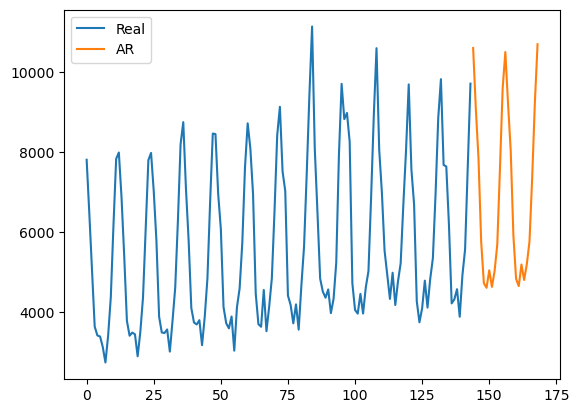

In [7]:
from statsmodels.tsa.ar_model import AutoReg

# train autoregression
Y=dfIT.values[:,1]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*ytp)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2022-01-01', end='2023-12-01', freq='MS'),'Gas consumed Mm3'] = forecast

<Axes: ylabel='Gas consumed Mm3'>

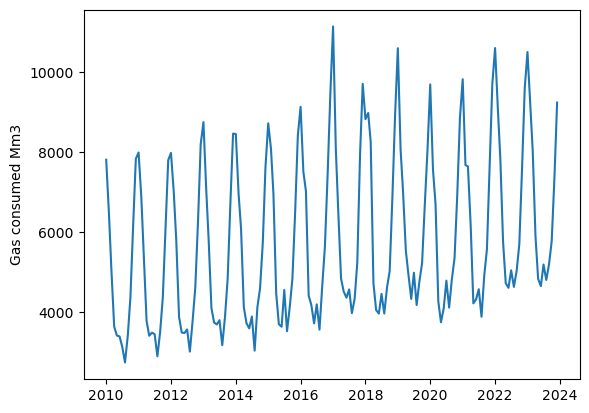

In [8]:
sb.lineplot(data=dfIT.loc[:,'Gas consumed Mm3'])

### Autocorrelation for total stocks

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                -639.842
Method:               Conditional MLE   S.D. of innovations            491.876
Date:                Sat, 18 May 2024   AIC                           1297.684
Time:                        17:59:37   BIC                           1319.561
Sample:                            60   HQIC                          1306.478
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2453.0684    318.605      7.699      0.000    1828.615    3077.522
y.L1           1.1906      0.112     10.611      0.000       0.971       1.411
y.L2          -0.6938      0.066    -10.481      0.0

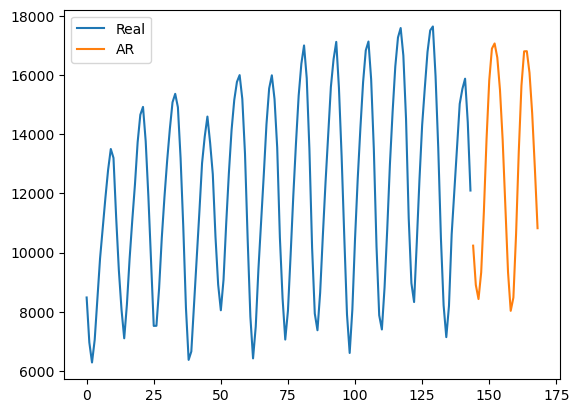

In [9]:
# train autoregression
Y=dfIT.values[:,3]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*ytp)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2022-01-01', end='2023-12-01', freq='MS'),'Total Gas Stocks Mm3'] = forecast

Comment: Italian max storage capacity is orders of magnitude more than what is observed here, so growth of strategic stocks would not be impeded by this factor. Lower peaks may be due to a higher consumption of energy, on par with the other metric.

### Autocorrelation for ratio

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                 110.949
Method:               Conditional MLE   S.D. of innovations              0.065
Date:                Sat, 18 May 2024   AIC                           -205.898
Time:                        17:59:37   BIC                           -186.452
Sample:                            60   HQIC                          -198.081
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0206      0.034      0.611      0.541      -0.046       0.087
y.L1           0.1474      0.072      2.058      0.040       0.007       0.288
y.L12          0.4422      0.089      4.971      0.0

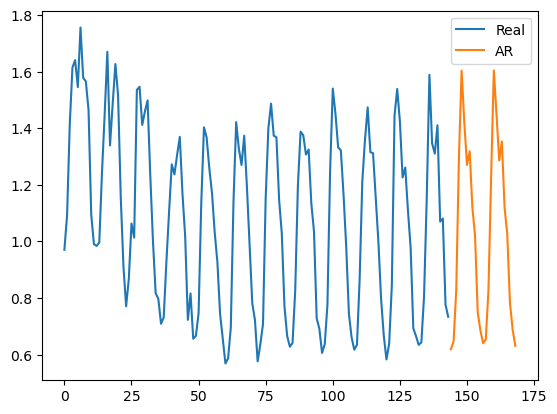

In [10]:
# train autoregression
Y=dfIT.values[:,0]
Y=Y[~np.isnan(Y)]

window = [1,12,24,26,48,60]
model = AutoReg(Y, lags=window, missing='drop')
model_fit = model.fit()

a = np.empty(12*ytp)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2022-01-01', end='2023-12-01', freq='MS'),'ratio'] = forecast

### Sine wave extension for ratio

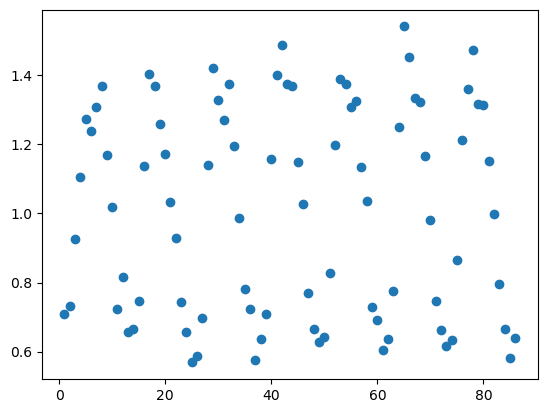

Amplitude=0.40, Angular freq.=0.52, phase=-1.94, offset=1.02, Max. Cov.=0.004504


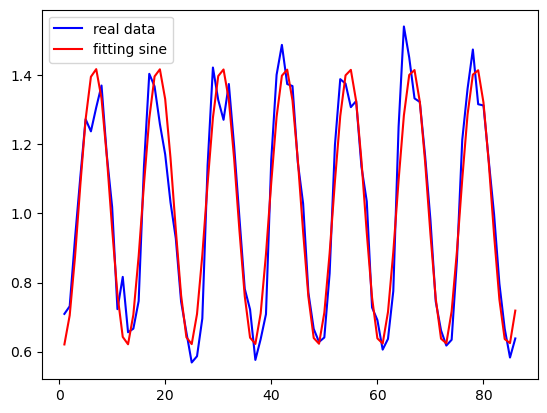

In [11]:
import numpy as np
import scipy.optimize

yy = dfIT.values[36:122,0]
yy=yy[~np.isnan(yy)]
tt = np.arange(1,len(yy)+1,1)

plt.scatter(tt, yy)
plt.show()

def fit_sin(tt, yy):
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1] - tt[0]))  # Assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:]) + 1])  # Exclude the zero frequency peak related to offset
    guess_amp = np.std(yy) * 2.0**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.0 * np.pi * guess_freq, 0.0, guess_offset])

    def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w / (2.0 * np.pi)
    fitfunc = lambda t: A * np.sin(w * t + p) + c
    return {
        "amp": A,
        "omega": w,
        "phase": p,
        "offset": c,
        "freq": f,
        "period": 1.0 / f,
        "fitfunc": fitfunc,
        "maxcov": np.max(pcov),
        "rawres": (guess, popt, pcov)
    }

def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

res1 = fit_sin(tt, yy)
print(f"Amplitude={res1['amp']:.2f}, Angular freq.={res1['omega']:.2f}, phase={res1['phase']:.2f}, offset={res1['offset']:.2f}, Max. Cov.={res1['maxcov']:.6f}")

yy1 = sinfunc(tt, res1['amp'], res1['omega'], res1['phase'], res1['offset'])
plt.plot(tt, yy, "-b", label="real data")
plt.plot(tt, yy1, "-r", label="fitting sine")
plt.legend(loc="upper left")
plt.show()

## Generating all other features

In [12]:
#'ratio' autoestimator
dfIT['autoEstimator'] = dfIT['ratio']*dfIT['Gas consumed Mm3']

#Extracting features
dfIT['Month'] = dfIT.index.month
dfIT['sinMonth'] = (1 + np.sin((dfIT['Month']+2)/6*np.pi))/2 #January is numerically close to December

#Shifted features
dfIT['Gas consumed last month Mm3'] = dfIT['Gas consumed Mm3'].shift(1) # Gas consumed the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed Mm3']
dfIT['Gas imported last month Mm3'] = dfIT['Gas imported Mm3'].shift(1) # Gas imported the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas imported Mm3']

#Balance features
dfIT['Gas consumed from stocks Mm3'] = dfIT['Total Gas Stocks Mm3'].shift(1) - dfIT['Total Gas Stocks Mm3'] #Gas that exited the reserves in 1 month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) Mm3'] = dfIT['Gas consumed Mm3'] - dfIT['Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) last month Mm3'] = dfIT['Net new gas (appx) Mm3'].shift(1)
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3']

#ratio features
dfIT['sine_ratio1'] = sinfunc(dfIT['Month'], res1['amp'], res1['omega'], res1['phase'], res1['offset'])
dfIT['sinEstimator1'] = dfIT['Gas consumed Mm3']*dfIT['sine_ratio1']

#Generating columns for imported gas and similar features
dfIT.loc[pd.date_range(start=pd.to_datetime('2022-01-01',format="%Y-%m-%d"), end=dfIT.index[-1], freq='MS'),'Gas imported Mm3'] = np.nan

dfIT = dfIT.drop(columns=['Month','sinMonth','ratio','sine_ratio1'])

display(dfIT)

,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3,autoEstimator,Gas consumed last month Mm3,Gas imported last month Mm3,Net new gas (appx) Mm3,Net new gas (appx) last month Mm3,sinEstimator1
2010-01-01,7807.900832,1520.357143,8484.500000,7577.0,7577.000000,6460.947916,7060.0,6287.543689,6287.543689,4847.983403
2010-02-01,6460.947916,1520.357143,6964.142857,7060.0,7060.000000,7807.900832,7577.0,4940.590773,6287.543689,4554.610321
2010-03-01,5036.395372,676.738095,6287.404762,7119.0,7119.000000,6460.947916,7060.0,4359.657277,4940.590773,4398.539682
2010-04-01,3635.755361,-763.809524,7051.214286,5870.0,5870.000000,5036.395372,7119.0,4399.564884,4359.657277,3929.870533
2010-05-01,3412.516655,-1377.047619,8428.261905,5600.0,5600.000000,3635.755361,5870.0,4789.564274,4399.564884,4340.159824
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5195.435679,-5.622334,16810.101477,NaN,5816.708450,4801.068456,NaN,5201.058013,5959.561828,6044.227294
2023-10-01,5768.253849,730.531242,16079.570235,NaN,5920.407404,5195.435679,NaN,5037.722607,5201.058013,5512.975950
2023-11-01,7362.089103,1369.510650,14710.059585,NaN,5766.861826,5768.253849,NaN,5992.578453,5037.722607,5632.919005
2023-12-01,9238.652135,1861.155609,12848.903976,NaN,6371.125705,7362.089103,NaN,7377.496526,5992.578453,5937.787572


# Regressing imports

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

dfITm = dfIT.copy() # copy of dataframe to find the best model
dfITm = dfITm.loc[dfITm.index <'2022-01-01']

Y=dfITm["Gas imported Mm3"].values                            #Identifying output Y
    
X=dfITm.drop(columns=["Gas imported Mm3"]).values             #Identifying input X

X_train, X_test, y_train, y_test = train_test_split(X,Y)
        

 ## Decision Tree Regressor

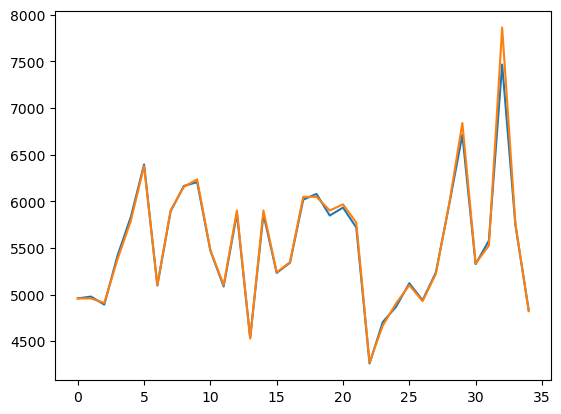

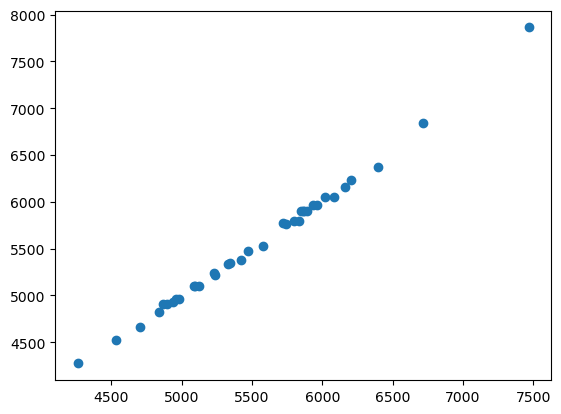

In [14]:
from sklearn.tree import DecisionTreeRegressor

DT_reg_mod = DecisionTreeRegressor()    #  regression Decision Tree object 


DT_reg_mod.fit(X_train, y_train)       # train the model with training sets


y_pred_DT = DT_reg_mod.predict(X_test) # predictions with testing set


plt.plot(y_test[1:240])
plt.plot(y_pred_DT[1:240])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [15]:
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT)                        
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
print(MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT)

34.916666666666664 -17.083333333333332 5492.083333333333 74.10859149473382 0.013381900183131698 -0.0030847632757678048


## Random Forest Regressor

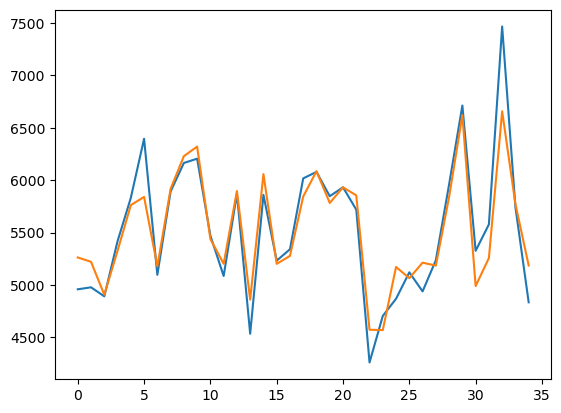

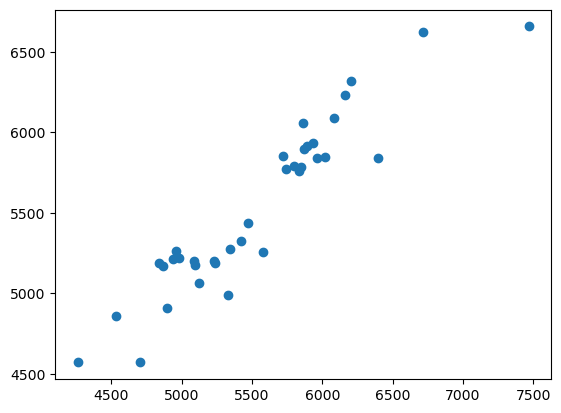

In [16]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

predictions = y_pred_RF

plt.plot(y_test[1:240])
plt.plot(y_pred_RF[1:240])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [17]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT)     #MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

164.72333036411987 -17.083333333333332 56130.31857574666 236.91837956508706 0.04278070926654428 -0.0030847632757678048


## Gradient Boosting Regressor

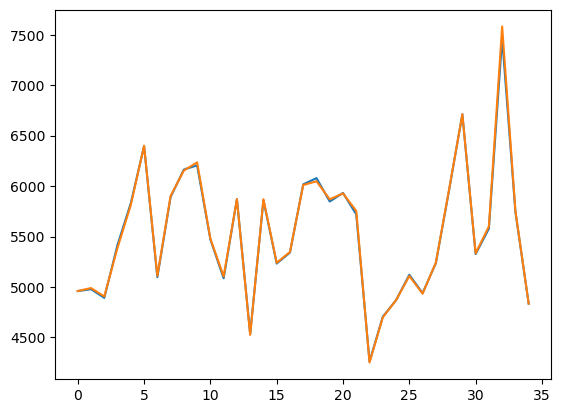

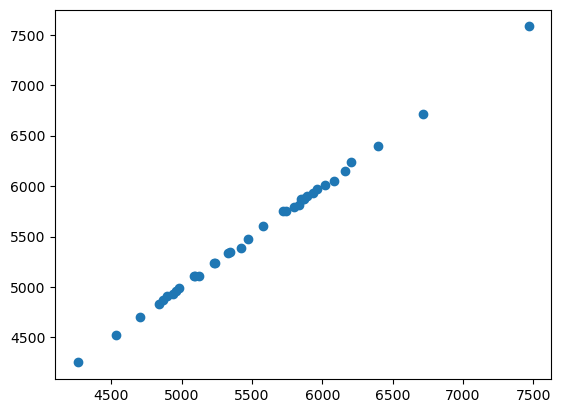

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

GB_mod = GradientBoostingRegressor()
GB_mod.fit(X_train, y_train)
y_pred_GB =GB_mod.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [19]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MBE_GB=np.mean(y_test-y_pred_GB)
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
NMBE_GB=MBE_GB/np.mean(y_test)
print(MAE_GB,MBE_GB,MSE_GB,RMSE_GB,cvRMSE_GB,NMBE_GB)

14.035328073445624 -5.728517588538681 571.3620902127068 23.903181591844774 0.004316233565767714 -0.0010344070642954576


## Bootstrapping

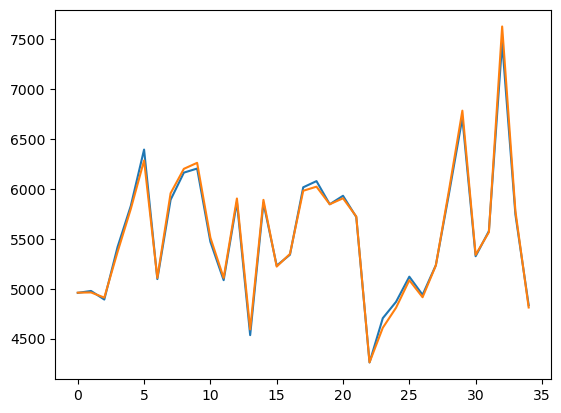

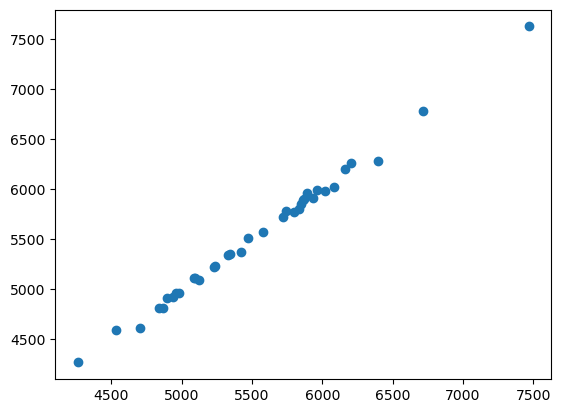

In [20]:
from sklearn.ensemble import BaggingRegressor

BT_mod = BaggingRegressor()
BT_mod.fit(X_train, y_train)
y_pred_BT = BT_mod.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_BT[1:200])
plt.show()
plt.scatter(y_test,y_pred_BT)

In [21]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
print(MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT)

36.65833333333335 -3.0583333333333433 2445.2869444444523 49.449842714051705 0.008929232710056636 -0.0005522478644911161


In [22]:
err_data = {
    
    'Decision Trees': [MAE_DT, MBE_DT, MSE_DT, RMSE_DT, cvRMSE_DT, NMBE_DT],
    'Random Forest': [MAE_RF, MBE_RF, MSE_RF, RMSE_RF, cvRMSE_RF, NMBE_RF],
    'Gradient Boosting': [MAE_GB, MBE_GB, MSE_GB, RMSE_GB, cvRMSE_GB, NMBE_GB],
    'Bootstrapping': [MAE_BT, MBE_BT, MSE_BT, RMSE_BT, cvRMSE_BT, NMBE_BT],
}

err_df = pd.DataFrame(err_data)                                                       


err_df.index = ['MAE', 'MBE', 'MSE', 'RMSE', 'cvRMSE', 'NMBE']                         

err_df.loc[['cvRMSE', 'NMBE']] = err_df.loc[['cvRMSE', 'NMBE']] * 100
err_df.loc[['cvRMSE', 'NMBE']] = err_df.loc[['cvRMSE', 'NMBE']].applymap("{:.2f}%".format)     


print(err_df.transpose())                      

                         MAE        MBE           MSE       RMSE cvRMSE  \
Decision Trees     34.916667 -17.083333   5492.083333  74.108591  1.34%   
Random Forest      164.72333 -17.083333  56130.318576  236.91838  4.28%   
Gradient Boosting  14.035328  -5.728518     571.36209  23.903182  0.43%   
Bootstrapping      36.658333  -3.058333   2445.286944  49.449843  0.89%   

                     NMBE  
Decision Trees     -0.31%  
Random Forest      -0.31%  
Gradient Boosting  -0.10%  
Bootstrapping      -0.06%  


Probably the best model is Bootstrapping, as for ASHRAE and IPMVP,cvRMSE should be  of less than 20% and NMBE shoulkd be within ±5%. Also Bootstrapping has the best values overall for our case.

Since we are using the feature "Gas 1m ago" (without it the predictions are unreliable), and we are trying to forecast the gas imports "as if" covid or the russo-ukrainian war did not happen, we shall resort to considering the forecasted data as the real data, for lack of a better alternative. Due to the errors that may arise, we will do two forecasts: one for the period 2020-2021 with the real data up to 2019 and another one for the period 2022-2023 with the real data up to 2021.

In [23]:
predictions1 = []

#questo mette le colonna 'imported gas' come prima colonna
dfIT.insert(0, 'Gas imported Mm3', dfIT.pop('Gas imported Mm3'))

Y_predicted = dfIT.loc[pd.to_datetime('2020-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3']

for date in pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=pd.to_datetime('2021-12-01',format="%Y-%m-%d"), freq='MS'):

    dfIT.loc[date,'Gas imported last month Mm3'] = Y_predicted
    #Take inputs
    X=[dfIT.drop(columns=["Gas imported Mm3"]).loc[date,:].values]
    [Y_predicted] = BT_mod.predict(X)
    predictions1.append(Y_predicted)



In [24]:
predictions2 = []

dfIT#

Y_predicted = dfIT.loc[pd.to_datetime('2022-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3']

for date in pd.date_range(start=pd.to_datetime('2022-01-01',format="%Y-%m-%d"), end=pd.to_datetime('2023-12-01',format="%Y-%m-%d"), freq='MS'):

    dfIT.loc[date,'Gas imported last month Mm3'] = Y_predicted
    #Take inputs
    X=[dfIT.drop(columns=["Gas imported Mm3"]).loc[date,:].values]
    [Y_predicted] = BT_mod.predict(X)
    predictions2.append(Y_predicted)



In [25]:
dfIT.loc[pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=pd.to_datetime('2021-12-01',format="%Y-%m-%d"), freq='MS'),'Gas imported Mm3'] = predictions1
dfIT.loc[pd.date_range(start=pd.to_datetime('2022-01-01',format="%Y-%m-%d"), end=pd.to_datetime('2023-12-01',format="%Y-%m-%d"), freq='MS'),'Gas imported Mm3'] = predictions2

<Axes: ylabel='Gas imported Mm3'>

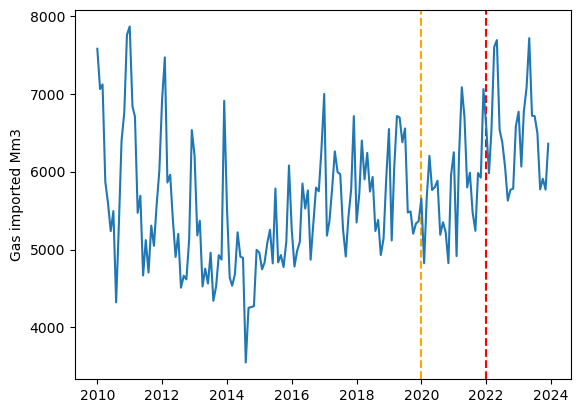

In [26]:
plt.axvline(pd.to_datetime('2020-01-01',format="%Y-%m-%d"), 0,8000, color='orange',ls='--')
plt.axvline(pd.to_datetime('2022-01-01',format="%Y-%m-%d"), 0,8000, color='red',ls='--')
sb.lineplot(data = dfIT['Gas imported Mm3'])

# Data exporting

We will export our data for dashboard usage.

In [27]:
dfIT.to_csv('Data_05.csv', index=True)